<a href="https://colab.research.google.com/github/srishtirai/INFO6105---Data-Science-Engineering-Methods-and-Tools/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML Data Cleaning and Feature Selection**

**Abstract**

The dataset titled "Airline Passenger Satisfaction" investigates factors influencing passenger contentment with airline services. The analysis focuses on data quality assessment, revealing a clean dataset without missing or inconsistent values. The study identifies the significance of various features in predicting passenger satisfaction. The results indicate that most independent variables are significant predictors, providing valuable insights for optimizing predictive models and enhancing accuracy in predicting airline passenger satisfaction.


In [ ]:
# install required libraries
!pip install pandas
!pip install eli5
!pip install statsmodels
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read the train data from github
train_data = pd.read_csv("https://github.com/srishtirai/INFO6105---Data-Science-Engineering-Methods-and-Tools/raw/main/Assignment-1/TrainData.csv")

#read the test data from github
test_data = pd.read_csv("https://github.com/srishtirai/INFO6105---Data-Science-Engineering-Methods-and-Tools/raw/main/Assignment-1/TestData.csv")

In [ ]:
# Displaying the first few rows of the training data to get a quick overview
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# Displaying the first few rows of the testing data to get a quick overview
test_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
# Drop unnecessary columns from the training data
train_data.drop(columns=["id"], inplace=True)
train_data.drop(columns=["Unnamed: 0"], inplace=True)

# Drop unnecessary columns from the testing data
test_data.drop(columns=["id"], inplace=True)
test_data.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
from IPython.display import display, Markdown

# List of sentences describing variables and their characteristics
sentences = [
    'Gender, Gender of the passengers, (Female, Male)',
    'Customer Type, The customer type, (Loyal customer, Disloyal customer)',
    'Age, The actual age of the passengers',
    'Type of Travel, Purpose of the flight of the passengers, (Personal Travel, Business Travel)',
    'Class, Travel class in the plane of the passengers, (Business, Eco, Eco Plus)',
    'Flight Distance, The flight distance of this journey',
    'Inflight wifi service, Satisfaction level of the inflight wifi service',
    'Departure/Arrival time convenient, Satisfaction level of Departure/Arrival time convenient',
    'Ease of Online booking, Satisfaction level of online booking',
    'Gate location, Satisfaction level of Gate location',
    'Food and drink, Satisfaction level of Food and drink',
    'Online boarding, Satisfaction level of online boarding',
    'Seat comfort, Satisfaction level of Seat comfort',
    'Inflight entertainment, Satisfaction level of inflight entertainment',
    'On-board service, Satisfaction level of On-board service',
    'Leg room service, Satisfaction level of Leg room service',
    'Baggage handling, Satisfaction level of baggage handling',
    'Checkin service , Satisfaction level of Check-in service',
    'Inflight service, Satisfaction level of inflight service',
    'Cleanliness, Satisfaction level of Cleanliness',
    'Departure Delay in Minutes, Minutes delayed when departure',
    'Arrival Delay in Minutes, Minutes delayed when Arrival',
    'satisfaction, Airline satisfaction level, (Satisfaction, Neutral, Dissatisfaction)'
]

# Function to create a table from the provided sentences
def create_table_from_sentences(sentences):
    data_list = []

    # Parse each sentence and extract information
    for sentence in sentences:
        sentence_data = [item.strip() for item in sentence.split(',')]
        variable_name = sentence_data[0]
        data_type = str(train_data.dtypes.get(variable_name, ''))
        possible_values = ', '.join(sentence_data[2:]) if len(sentence_data) > 2 else '(Satisfaction level: 1-5)'
        data = {
            'Variable': variable_name,
            'Description': sentence_data[1],
            'Possible Values': possible_values,
            'Data Type': data_type
        }
        data_list.append(data)

    # Create a DataFrame and display it with color highlighting
    pd.set_option('display.max_rows', None)
    df = pd.DataFrame(data_list, columns=['Variable', 'Description', 'Possible Values', 'Data Type'])
    style_df = df.style.apply(lambda row: ['background-color: lightblue' if 'object' in row['Data Type'] else 'background-color: lightcoral']*len(row), axis=1)
    display(style_df)

# Call the function with the provided sentences
create_table_from_sentences(sentences)

,Variable,Description,Possible Values,Data Type
0,Gender,Gender of the passengers,"(Female, Male)",object
1,Customer Type,The customer type,"(Loyal customer, Disloyal customer)",object
2,Age,The actual age of the passengers,(Satisfaction level: 1-5),int64
3,Type of Travel,Purpose of the flight of the passengers,"(Personal Travel, Business Travel)",object
4,Class,Travel class in the plane of the passengers,"(Business, Eco, Eco Plus)",object
5,Flight Distance,The flight distance of this journey,(Satisfaction level: 1-5),int64
6,Inflight wifi service,Satisfaction level of the inflight wifi service,(Satisfaction level: 1-5),int64
7,Departure/Arrival time convenient,Satisfaction level of Departure/Arrival time convenient,(Satisfaction level: 1-5),int64
8,Ease of Online booking,Satisfaction level of online booking,(Satisfaction level: 1-5),int64
9,Gate location,Satisfaction level of Gate location,(Satisfaction level: 1-5),int64


**What are the data types? (Only numeric and categorical)**

Observations regarding the data type:

1. The dataset consists of **5 categorical variables** and **17 numeric variables**.
2. All the variables, except for 'Satisfaction,' are considered independent variables, while 'Satisfaction' serves as the dependent variable.
3. The training dataset contains a total of 103,903 customer responses.
4. The testing dataset contains a total of 25975 customer responses.

**Are there missing values?**


**Which independent variables have missing data? How much?**

In [ ]:
# Check the count of missing values in each column of the 'train_data' DataFrame
train_data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


*   It appears that there are missing values in the "Arrival Delay in Minutes" column, with 310 missing values.
*   The other columns do not have any missing values.

Arrival Delay in Minutes


Mean: 15.18,
Median (50%): 0.0,
75th Percentile: 13.0,
Maximum: 1584.0

The distribution is right-skewed, with a large difference between the mean and median. This suggests the presence of outliers, as the mean is influenced by extreme values. Given this distribution, using the **median might be a more robust choice for imputation**. The median is less sensitive to outliers and represents the central tendency of the data better in skewed distributions.

In [ ]:
# Calculate the median of 'Arrival Delay in Minutes'
median_arrival_delay = train_data['Arrival Delay in Minutes'].median()

# Fill missing values in 'Arrival Delay in Minutes' with the calculated median
train_data['Arrival Delay in Minutes'].fillna(median_arrival_delay, inplace=True)

# Check the count of missing values in each column of the 'train_data' DataFrame
train_data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

**What are the likely distributions of the numeric variables?**

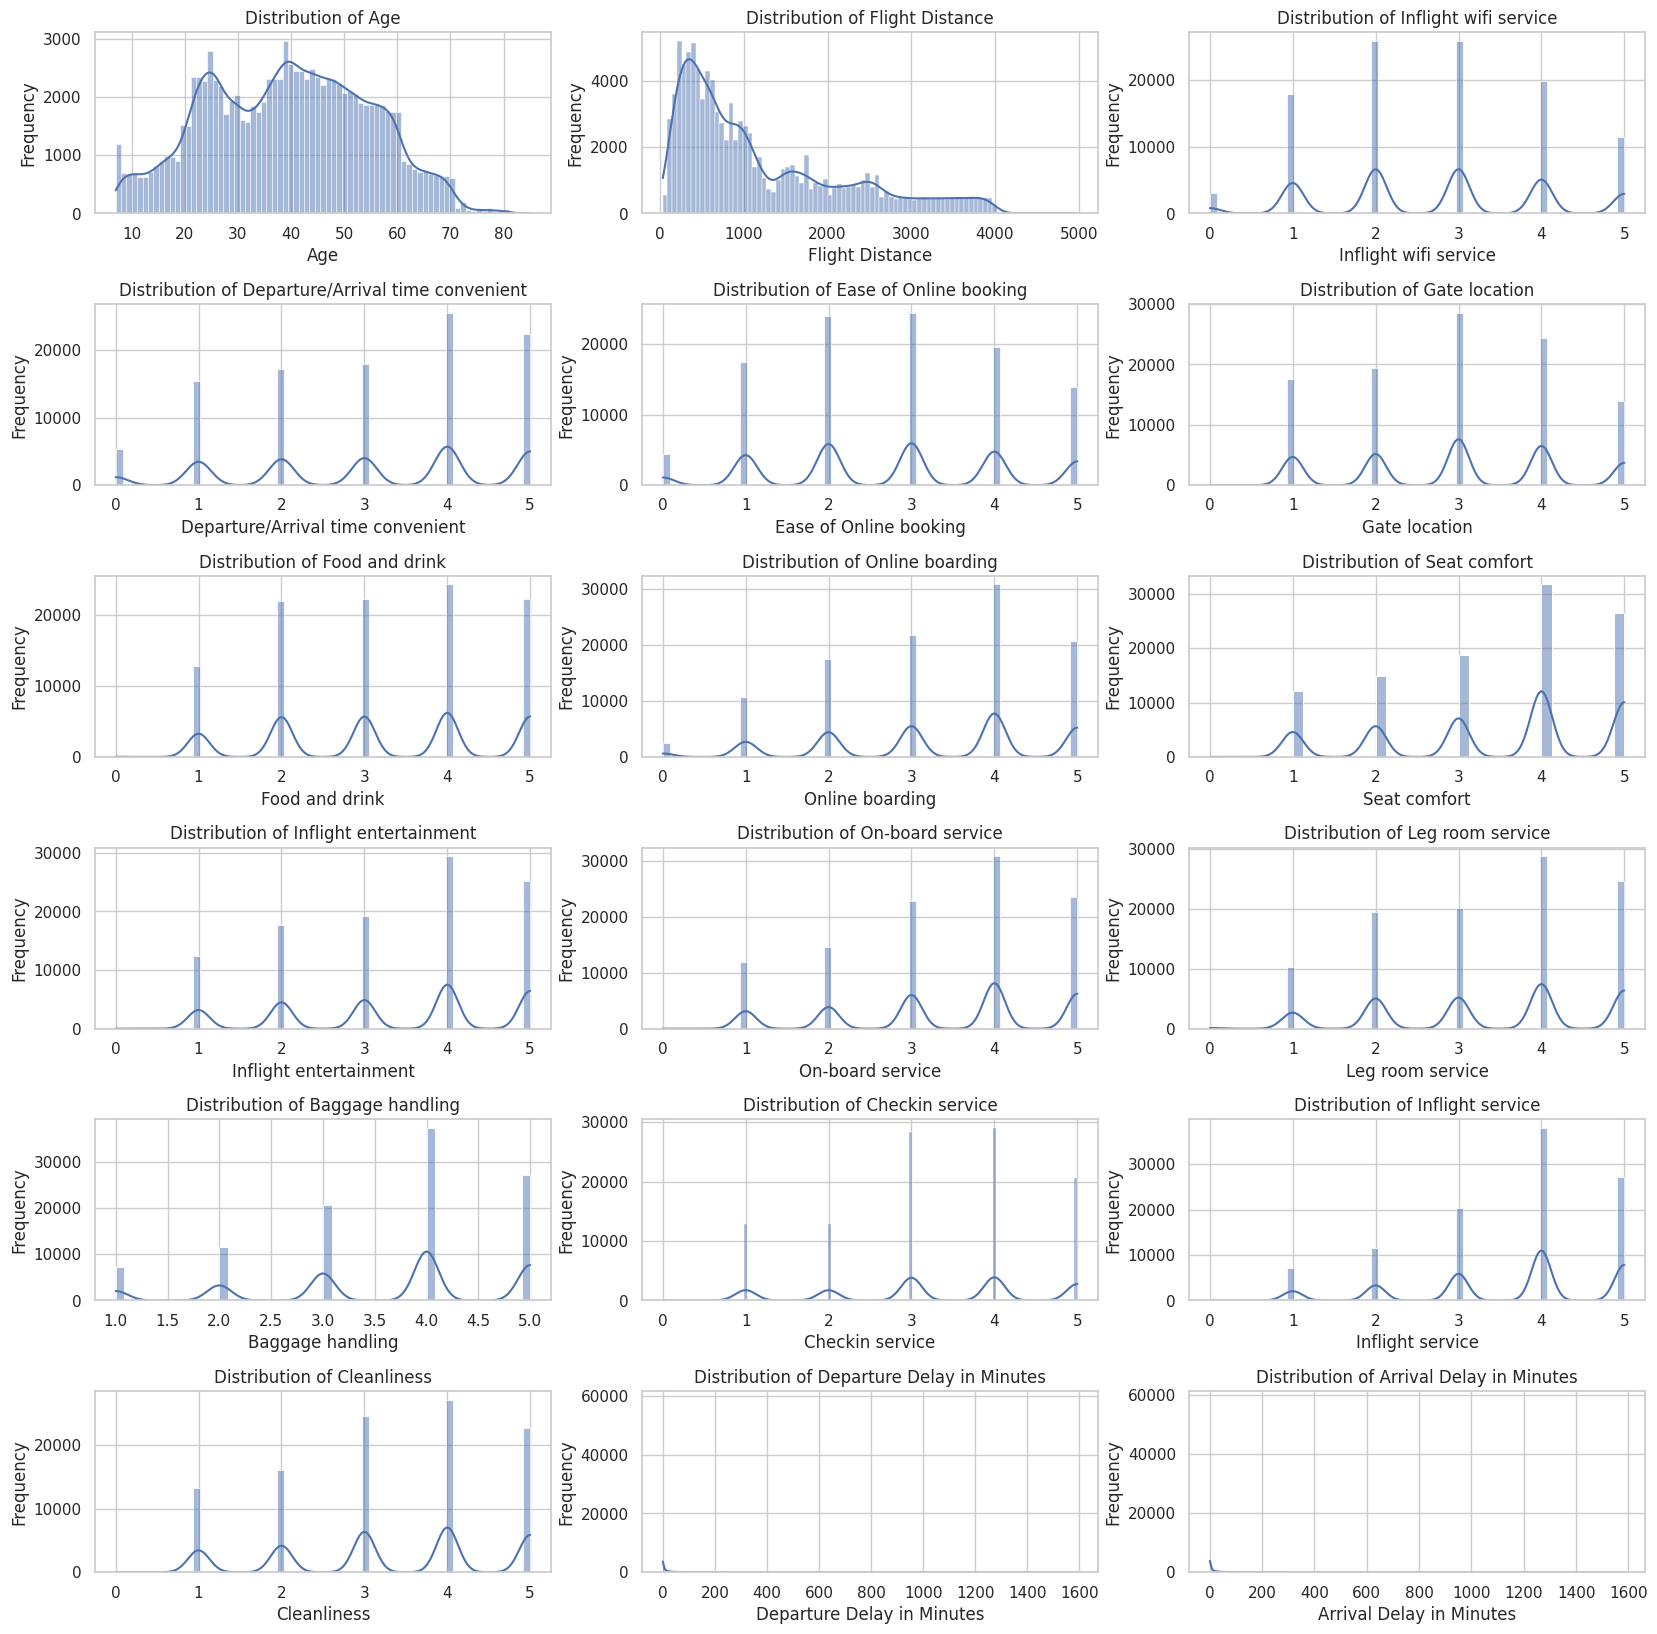

In [ ]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

numeric_columns = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
                    'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                    'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
                    'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
                    'Arrival Delay in Minutes']

# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Plot each numeric variable
for i, var in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    sns.histplot(train_data[var], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel(var)  # X-axis label
    axes[row, col].set_ylabel('Frequency')  # Y-axis label

# Show the plots
plt.show()


In [ ]:
train_data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Based on the provided summary statistics for the variables and the plots above, here are the likely distributions:

1.  Age:

  * The distribution of age appears to be slightly positively skewed, with a peak around the late 30s to early 40s.
  * It does not strictly follow a normal distribution but shows a central tendency.

2. Flight Distance:

  * The distribution of flight distance is right-skewed, indicating that shorter distances are more common.
  * There is a peak in the lower distance range, and the distribution tails off towards longer distances.

3. Satisfaction Variables (Inflight Wifi Service, Departure/Arrival Time Convenient, Ease of Online Booking, Gate Location, Food and Drink, Online Boarding, Seat Comfort, Inflight Entertainment, On-board Service, Leg Room Service, Baggage Handling, Checkin Service, Inflight Service, Cleanliness):

  * The distribution is spread across various levels.
  * No strong indication of a specific distribution, but satisfaction ratings are diverse.

4. Departure Delay in Minutes:

  * The distribution of departure delay in minutes is right-skewed, with shorter delays being more common.
  * There is a peak in the lower delay range.

5. Arrival Delay in Minutes:

  * The distribution of arrival delay in minutes is right-skewed, similar to departure delay.
  * Shorter delays are more common, with a peak in the lower range.




**What are the distributions of the predictor variables?**

In addition to the distribution for the Numerical variables as shown above there are 4 categorical predictor varibles. Lets analyse the distribution for these.

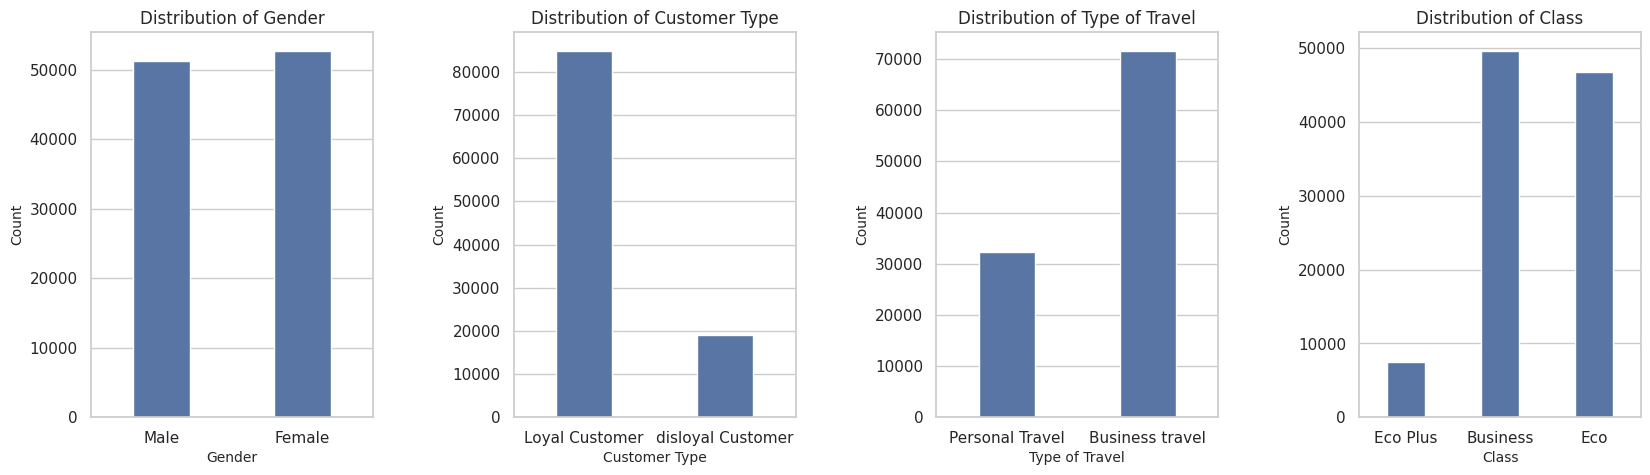

In [ ]:
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.subplots_adjust(wspace=0.5)  # Adjust the horizontal space between subplots
bar_width = 0.4
# Plot each categorical variable
for i, var in enumerate(categorical_columns):
    col = i
    sns.countplot(x=var, data=train_data, ax=axes[col], width=bar_width)
    axes[col].set_title(f'Distribution of {var}', fontsize=12)
    axes[col].set_xlabel(var, fontsize=10)
    axes[col].set_ylabel('Count', fontsize=10)

# Show the plots
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def display_categorical_distribution(data, categorical_columns):
    for i, var in enumerate(categorical_columns):
        # Count of each category
        category_counts = data[var].value_counts()

        # Calculate proportion (percentage) of each category
        category_proportions = category_counts / len(data) * 100

        # Create a DataFrame to display in tabular format
        distribution_table = pd.DataFrame({
            f"{var} Count": category_counts,
            f"{var} Proportion (%)": category_proportions
        })

        # Display the table
        print(f"\nDistribution of {var}:")
        display(distribution_table)

categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
display_categorical_distribution(train_data, categorical_columns)





Distribution of Gender:


,Gender Count,Gender Proportion (%)
Female,52727,50.745881
Male,51177,49.254119



Distribution of Customer Type:


,Customer Type Count,Customer Type Proportion (%)
Loyal Customer,84923,81.732176
disloyal Customer,18981,18.267824



Distribution of Type of Travel:


,Type of Travel Count,Type of Travel Proportion (%)
Business travel,71655,68.962696
Personal Travel,32249,31.037304



Distribution of Class:


,Class Count,Class Proportion (%)
Business,49665,47.798930
Eco,46745,44.988643
Eco Plus,7494,7.212427


Based on the provided summary statistics for the variables and the plots above:

* Gender:

    The distribution of Gender shows a relatively balanced representation, with a slight majority of females compared to males.This suggests that the dataset includes a nearly equal number of observations for both genders.


* Customer Type:

    The distribution of Customer Type indicates that a significant majority of customers in the dataset are categorized as Loyal Customers, while the remaining are classified as Disloyal Customers.

* Type of Travel:

    The distribution of Type of Travel suggests that the dataset contains a higher proportion of observations related to Business Travel compared to Personal Travel.

* Class:

    The distribution of Class indicates that the majority of observations fall into the Business class, followed by Eco class, and Eco Plus class.

**Do the ranges of the predictor variables make sense?**


The ranges of the predictor variables appear to make sense based on the summary statistics provided:

1. Age:
    
    The minimum age is 7, and the maximum age is 85, which is within a reasonable range for passengers.

2. Flight Distance:

    The flight distance ranges from 31 to 4983, representing the distances traveled by passengers.

3. Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness:

    The satisfaction level for inflight wifi service ranges from 0 to 5, indicating the satisfaction ratings.

4. Departure Delay in Minutes, Arrival Delay in Minutes:

    The departure delay and arrival delay are given in minutes, ranging from 0 to a maximum value of 1592 and 1584, respectively.

5. Gender:

    The count and proportion of Female and Male passengers are provided, and the percentages add up to 100%.

6. Customer Type:

    There are two customer types, Loyal Customer and Disloyal Customer, with counts and proportions.

7. Type of Travel:

    Business travel and Personal Travel are the two types, and their counts and proportions are presented.

8. Class:

    Business, Eco, and Eco Plus are the travel classes, and their counts and proportions are given.

**Which independent variables are useful to predict a target (dependent variable)?**

For this model, the most useful Independent Variables can be statistically determined using the following methods:

1. Correlation Analysis
2. Feature Importance from Tree-based Models
3. Recursive Feature Elimination (RFE)

**Correlation Analysis:**



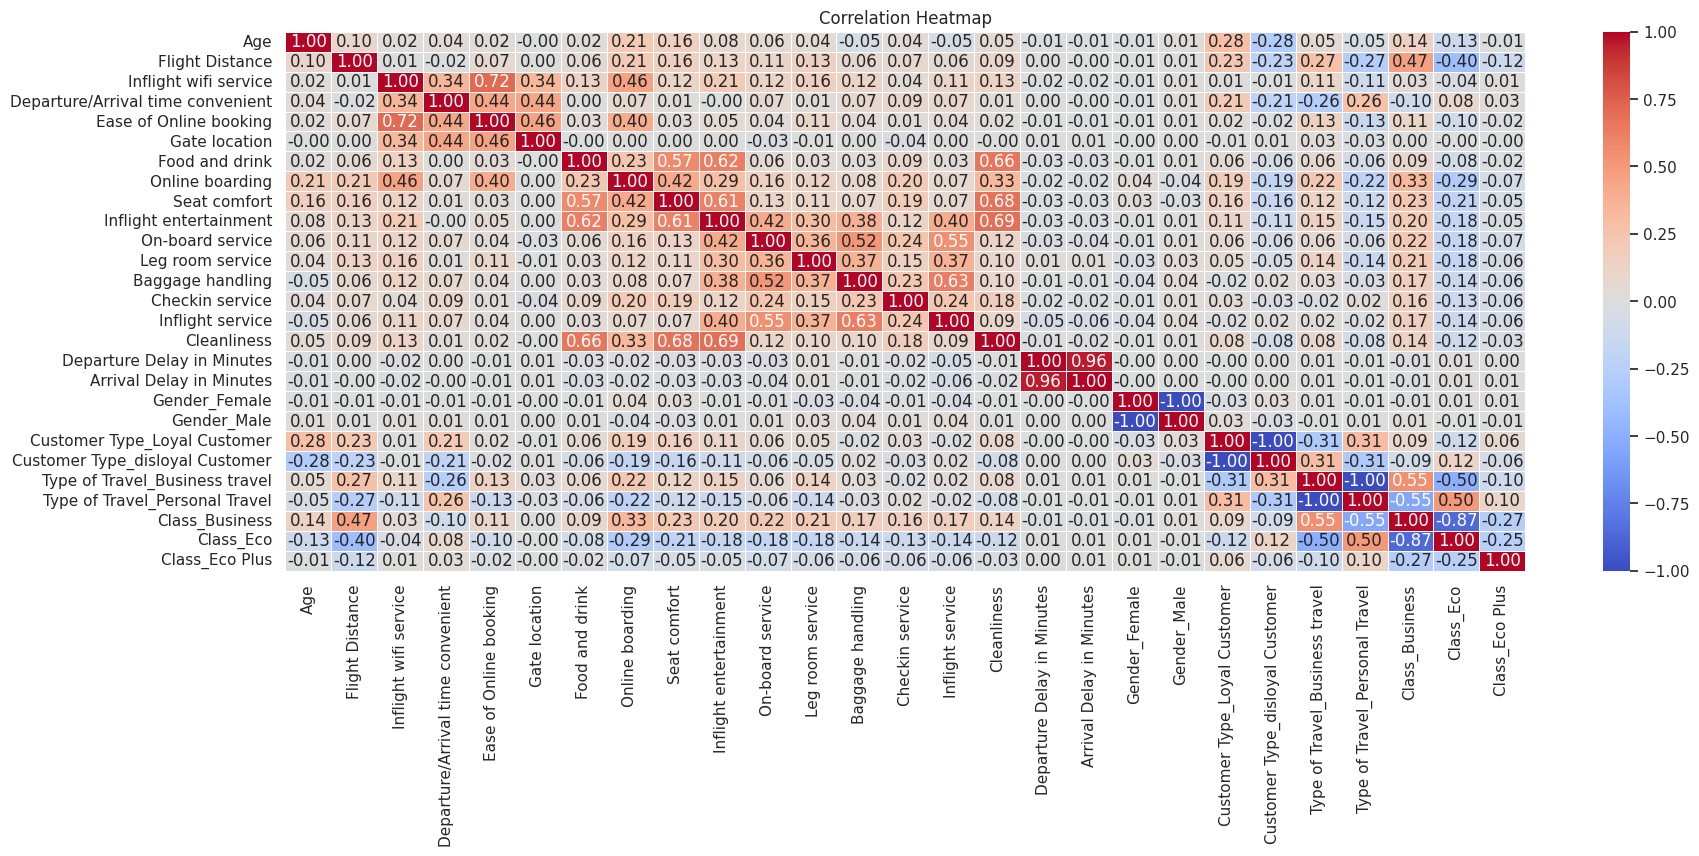

In [ ]:
import numpy as np

# Get numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix for numerical variables
correlation_matrix_numeric = train_data[numeric_columns].corr()

# Set the correlation threshold for numerical variables
correlation_threshold_numeric = 0.7

# Find pairs with correlation above the threshold for numerical variables
high_correlation_pairs_numeric = (correlation_matrix_numeric.abs() > correlation_threshold_numeric) & (correlation_matrix_numeric < 1)

# One-hot encode categorical variables
train_data_encoded = pd.get_dummies(train_data.drop(numeric_columns, axis=1))

# Concatenate numerical and encoded categorical variables
train_data_combined = pd.concat([train_data[numeric_columns], train_data_encoded], axis=1)

# Remove 'satisfaction' from the dataframe before calculating the correlation matrix
columns_to_drop = ['satisfaction_neutral or dissatisfied', 'satisfaction_satisfied']
train_data_combined_no_target = train_data_combined.drop(columns=columns_to_drop, axis=1)

# Calculate correlation matrix for all variables excluding 'satisfaction'
correlation_matrix_combined = train_data_combined_no_target.corr()

# Set the correlation threshold for all variables
correlation_threshold_combined = 0.7

# Find pairs with correlation above the threshold for all variables
high_correlation_pairs_combined = (correlation_matrix_combined.abs() > correlation_threshold_combined) & (correlation_matrix_combined < 1)

# Plot the correlation heatmap
plt.figure(figsize=(20, 7))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Let's interpret which independent variables appear to be useful in predicting the target.

Considering the one's with high correlation here are the observations:

1. Inflight wifi service:

    This variable has a high absolute correlation with the target. A high positive correlation may indicate that **higher satisfaction with inflight wifi service is associated with higher satisfaction overall**.


2. Ease of Online booking:

    Similar to inflight wifi service, a high absolute correlation suggests that **higher satisfaction with the ease of online booking is associated with higher overall satisfaction**.

3. Departure Delay in Minutes and Arrival Delay in Minutes:

    Both variables have a high absolute correlation. However, these are related to delays, and the interpretation differ. High positive correlations suggest that **longer delays in departure and arrival are associated with lower satisfaction**.

These variables are likely to be useful in predicting the target variable, but correlation alone does not imply causation. Additional analysis and modeling techniques may be needed to understand the relationships more thoroughly and build a predictive model.


Based on the observations provided, it appears that the following independent variables are identified as potentially useful in predicting the target:

1. Inflight wifi service
2. Ease of Online booking
3. Departure Delay in Minutes
4. Arrival Delay in Minutes
5. Gender (both Female and Male)
6. Customer Type (both Loyal Customer and Disloyal Customer)
7. Type of Travel (both Business travel and Personal Travel)
8. Class (both Business and Eco)

These variables show a significant correlation, either positive or negative, with the target variable. When building a predictive model, these variables could be considered as potentially important features for predicting customer satisfaction or the target variable in question. However, further analysis, model validation, and consideration of other factors are essential in the model-building process.

In [ ]:
print(high_correlation_pairs_combined.any())

Age                                  False
Flight Distance                      False
Inflight wifi service                 True
Departure/Arrival time convenient    False
Ease of Online booking                True
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes            True
Arrival Delay in Minutes              True
Gender_Female                         True
Gender_Male                           True
Customer Type_Loyal Customer          True
Customer Type_disloyal Customer       True
Type of Travel_Business travel        True
Type of Tra

**In the predictor variables independent of all the other predictor variables?**

The predictor variables are not completely independent of each other. There are instances of moderate to high correlation between certain pairs of predictor variables. Specifically:

1. Inflight wifi service and Ease of Online booking:

    These variables are positively correlated, indicating that passengers who are satisfied with inflight wifi service are also likely to be satisfied with the ease of online booking.


2. Departure Delay in Minutes and Arrival Delay in Minutes:

    These variables are positively correlated, suggesting that flights with longer departure delays tend to have longer arrival delays.

    Gender (Female and Male):

3. Customer Type, Type of Travel and Travel Class:
    Both customer types, types of travel, and travel classes show correlations with the target variable, and considering both can provide insights into passenger satisfaction. It's important to analyze and understand the dynamics of different customer types, travel purposes, and travel classes for a more comprehensive understanding of the factors influencing satisfaction levels.




**Feature Importance from Tree-based Models:**

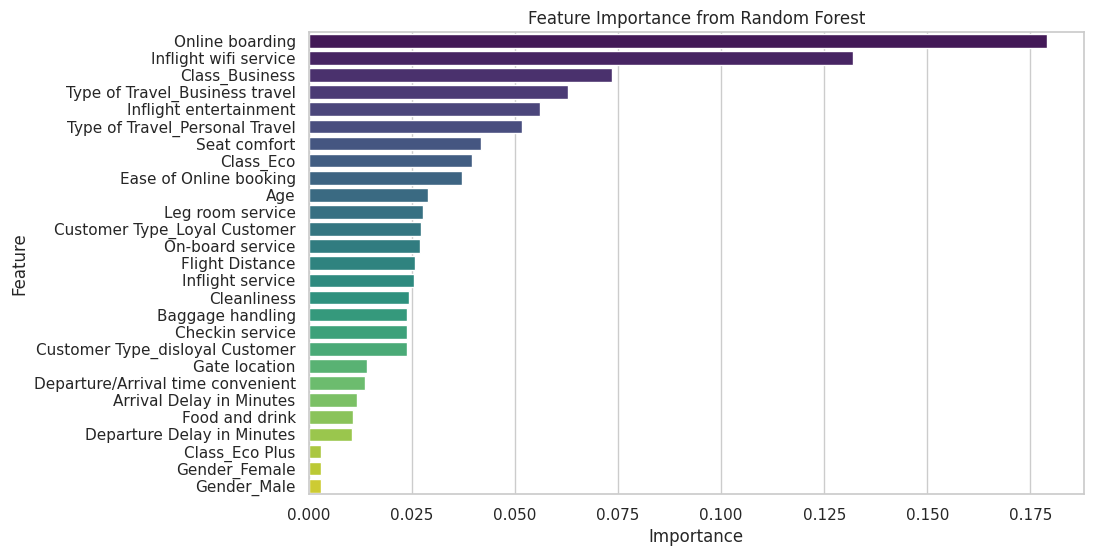

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming train_data is your feature matrix and target_variable is your target variable
X = train_data.drop('satisfaction', axis=1)
y = train_data['satisfaction']

X_encoded = pd.get_dummies(X, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])

# Create and fit the Random Forest model
model = RandomForestClassifier()
model.fit(X_encoded, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df, palette='viridis', dodge=False)
plt.title('Feature Importance from Random Forest')
plt.legend().set_visible(False)
plt.show()

The bar plot visualizes the importance scores of each feature.



*  Features with higher importance scores are more influential in making predictions.
*  Similar to the obersavtion from the earliar analysis using Correlation **Inflight wifi service and Ease of Online booking** seem to be important for target prediction.

**Recursive Feature Elimination (RFE) :**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Assuming 'train_data' is your DataFrame
train_data_encoded = pd.get_dummies(train_data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])

# Encode the target variable
le = LabelEncoder()
train_data_encoded['satisfaction'] = le.fit_transform(train_data_encoded['satisfaction'])

X = train_data_encoded.drop('satisfaction', axis=1)
y = train_data_encoded['satisfaction']

# Create the model for RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)  # Set the desired number of features

# Fit RFE
fit = rfe.fit(X, y)

# Retrieve selected features
selected_features = X.columns[fit.support_]

# Print the selected features
print("Selected Features:")
# Print the selected features one after the other
for feature in selected_features:
    print(feature)

Selected Features:
Inflight wifi service
Ease of Online booking
Online boarding
Inflight entertainment
On-board service
Customer Type_Loyal Customer
Customer Type_disloyal Customer
Type of Travel_Business travel
Type of Travel_Personal Travel
Class_Business


Based on the selected features:

1. Service and Satisfaction:

  * The selected features include variables related to passenger satisfaction with various services, such as inflight wifi, online booking, boarding process, entertainment, and on-board services.
  * This suggests that the passenger's perception of these services significantly contributes to predicting their overall satisfaction with the airline.

2. Customer Type Influence:

  * The inclusion of features related to customer type (loyal or disloyal) indicates that the type of customer plays a role in predicting satisfaction.
  * Loyal and disloyal customer categories may have distinct preferences or expectations, influencing their satisfaction levels differently.

3. Travel Purpose and Class Impact:

  * Variables representing the type of travel (business or personal) and travel class (business) are also among the selected features.
  * This implies that the purpose of travel and the class in which a passenger is traveling contribute to predicting their satisfaction with the airline.

**These selected features collectively reflect a combination of service-related aspects, customer characteristics, and travel-specific factors that are deemed important for predicting overall satisfaction in the given dataset.**

**Which predictor variables are the most important?**

Considering the overlap and consistency in features selected by different methods, the most important predictor variables are likely:

1. Inflight wifi service
2. Ease of Online booking
3. Type of Travel (both Business travel and Personal Travel)
4. Class (both Business and Eco)
5. Inflight entertainment
6. Online boarding

**Do the training and test sets have the same data?**

In [ ]:
# Assuming train_data and test_data are your training and test datasets
train_unique_values = train_data.nunique()
test_unique_values = test_data.nunique()

# Compare the unique values between training and test sets
unique_values_comparison = pd.DataFrame({
    'Train_Unique_Values': train_unique_values,
    'Test_Unique_Values': test_unique_values
})

# Display the comparison in a more readable format
print("Comparison of Unique Values between Training and Test Sets:")
print(unique_values_comparison)

# Check if any feature has different unique values between the two sets
differences = unique_values_comparison[unique_values_comparison['Train_Unique_Values'] != unique_values_comparison['Test_Unique_Values']]

# Print features with different unique values
if not differences.empty:
    print("\nFeatures with Different Unique Values:")
    print(differences)
else:
    print("\nAll features have the same unique values in both sets.")


Comparison of Unique Values between Training and Test Sets:
                                   Train_Unique_Values  Test_Unique_Values
Gender                                               2                   2
Customer Type                                        2                   2
Age                                                 75                  75
Type of Travel                                       2                   2
Class                                                3                   3
Flight Distance                                   3802                3281
Inflight wifi service                                6                   6
Departure/Arrival time convenient                    6                   6
Ease of Online booking                               6                   6
Gate location                                        6                   5
Food and drink                                       6                   6
Online boarding                         

Here are a few points explaining the observations from the comparison of unique values between the training and test sets:

  * These differences indicate that certain features exhibit variations or discrepancies in the unique values recorded between the training and test sets, which may impact the model's generalization performance.
  * It's essential to handle such differences appropriately during data preprocessing and feature engineering to ensure consistency in model training and evaluation.

**Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

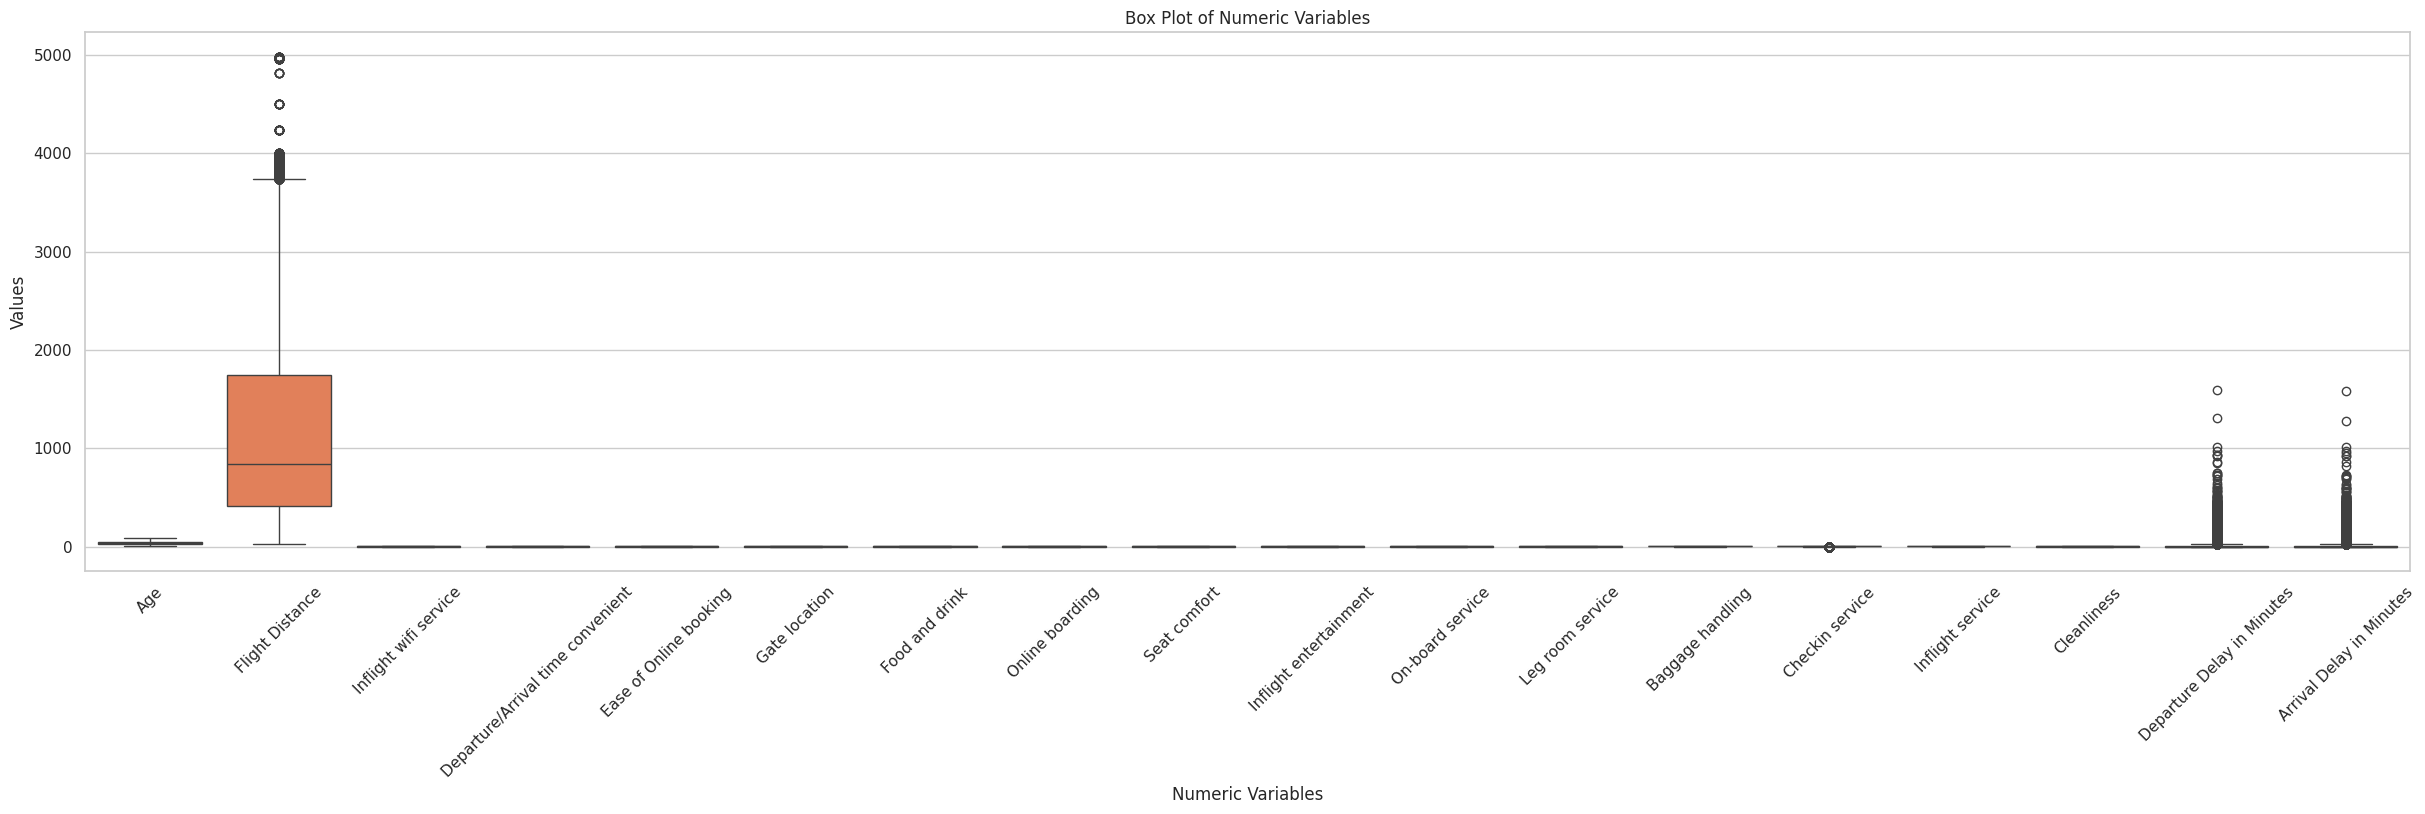

In [ ]:
# Box plot for identifying outliers
plt.figure(figsize=(30, 7))
sns.boxplot(data=train_data[numeric_columns])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Box Plot of Numeric Variables')
plt.xlabel('Numeric Variables')  # X-axis label
plt.ylabel('Values')  # Y-axis label
plt.show()

Normalize the data in order to mitigate the impact of outliers by bringing all variables to a similar scale.

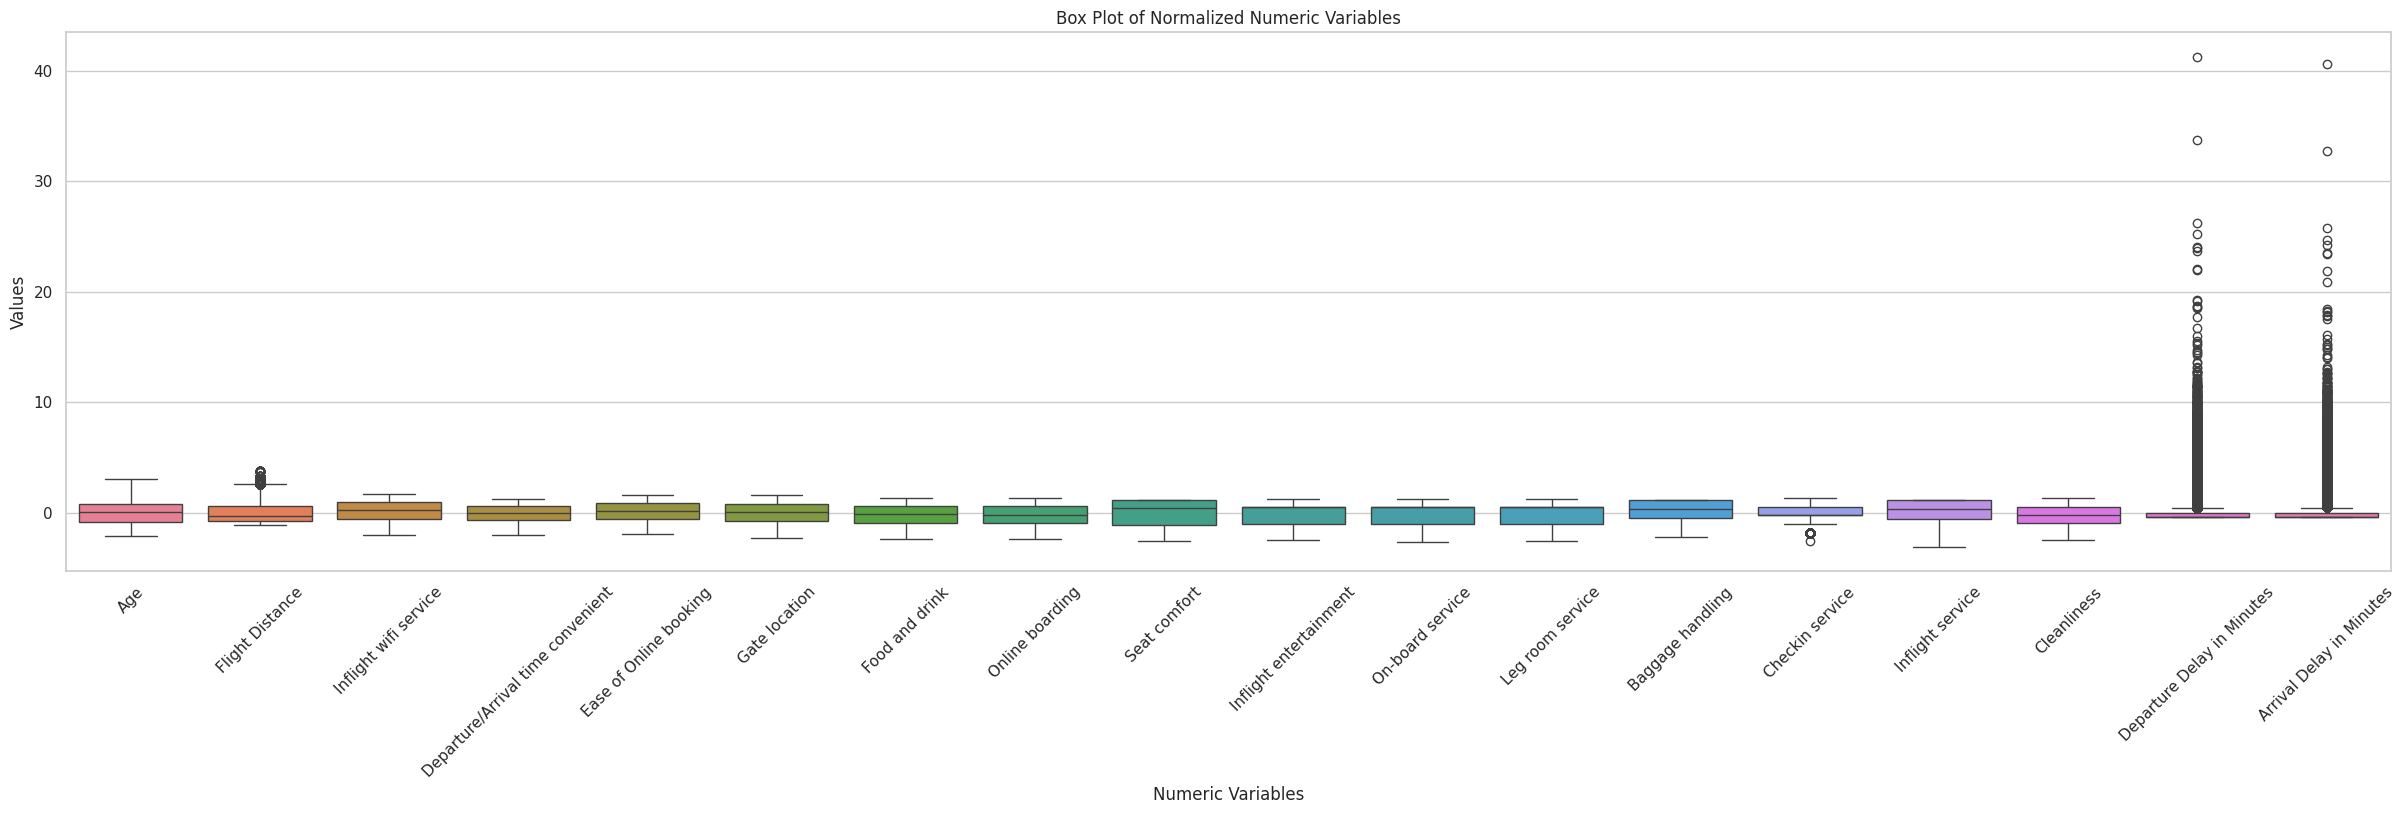

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract numeric columns for normalization
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the numeric columns
train_data_normalized = train_data.copy()
train_data_normalized[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])

# Box plot for identifying outliers on normalized data
plt.figure(figsize=(30, 7))
sns.boxplot(data=train_data_normalized[numeric_columns])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Box Plot of Normalized Numeric Variables')
plt.xlabel('Numeric Variables')  # X-axis label
plt.ylabel('Values')  # Y-axis label
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import zscore

# HotCode Categorical values
encoder = OneHotEncoder(sparse=False, drop='first')
train_data_encoded = pd.get_dummies(train_data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)

# Step 1: Split the Data
X = train_data_encoded.drop('satisfaction', axis=1)
y = train_data_encoded['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build Models
model_with_outliers = RandomForestClassifier(random_state=42)
model_with_outliers.fit(X_train, y_train)

# Step 3: Evaluate Model Performance
predictions_with_outliers = model_with_outliers.predict(X_test)
accuracy_with_outliers = accuracy_score(y_test, predictions_with_outliers)
print(f'Accuracy with outliers: {accuracy_with_outliers}')

# Step 4: Remove Outliers
train_data_no_outliers = train_data_encoded.copy()  # Copy the original data
for col in numeric_columns:
    z_scores = zscore(train_data_no_outliers[col])
    train_data_no_outliers = train_data_no_outliers[(z_scores < 3) & (z_scores > -3)]

# Step 5: Split the Modified Data
X_no_outliers = train_data_no_outliers.drop('satisfaction', axis=1)
y_no_outliers = train_data_no_outliers['satisfaction']
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# Step 6: Build Models (without outliers)
model_without_outliers = RandomForestClassifier(random_state=42)
model_without_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Step 7: Evaluate Model Performance (without outliers)
predictions_without_outliers = model_without_outliers.predict(X_test_no_outliers)
accuracy_without_outliers = accuracy_score(y_test_no_outliers, predictions_without_outliers)
print(f'Accuracy without outliers: {accuracy_without_outliers}')


Accuracy with outliers: 0.9618401424378038
Accuracy without outliers: 0.9611463352777073


The comparison of model performance with and without outliers indicates that **removing outliers has a minimal effect on the final predictive model**. The slight decrease in accuracy when outliers are removed suggests that the outliers may not be significantly influencing the model's predictions.

**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

Impute data using **Mean Imputation**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate example data
np.random.seed(42)
data = pd.DataFrame({
    'Numeric_Column': np.random.randn(100),
    'Categorical_Column': np.random.choice(['A', 'B', 'C'], size=100)
})

# Step 1: Remove Random Data Points
percentage_to_remove = 0.01  # Adjust as needed
random_indices_to_remove = np.random.choice(data.index, size=int(len(data) * percentage_to_remove), replace=False)
data_removed = data.copy()
data_removed.loc[random_indices_to_remove, 'Numeric_Column'] = np.nan  # Numeric column
data_removed.loc[random_indices_to_remove, 'Categorical_Column'] = np.nan  # Categorical column

# Step 2: Impute Missing Values (Mean Imputation for Numeric Data, Most Frequent for Categorical Data)
imputer_mean = SimpleImputer(strategy='mean')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')

data_imputed_mean = pd.DataFrame(imputer_mean.fit_transform(data_removed[['Numeric_Column']]), columns=['Numeric_Column'])
data_imputed_most_frequent = pd.DataFrame(imputer_most_frequent.fit_transform(data_removed[['Categorical_Column']]), columns=['Categorical_Column'])

# Combine imputed data with the original data
data_imputed = pd.concat([data_imputed_mean, data_imputed_most_frequent], axis=1)

# Step 3: Evaluate Recovery (Percent Error for Numeric Data)
true_values = data['Numeric_Column'].loc[random_indices_to_remove]
imputed_values_mean = data_imputed['Numeric_Column'].loc[random_indices_to_remove]
percent_error_mean = np.abs((true_values - imputed_values_mean) / true_values) * 100

# Print the percent error
print("Percent Error for Numeric Data (Mean Imputation):")
print(percent_error_mean)

# Step 4: Evaluate Recovery for Categorical Data (Accuracy and Confusion Matrix)
true_labels = data['Categorical_Column'].loc[random_indices_to_remove]
imputed_labels_most_frequent = data_imputed['Categorical_Column'].loc[random_indices_to_remove]

# Calculate accuracy
accuracy_most_frequent = accuracy_score(true_labels, imputed_labels_most_frequent)

# Calculate confusion matrix
conf_matrix_most_frequent = confusion_matrix(true_labels, imputed_labels_most_frequent, labels=['A', 'B', 'C'])

# Print results for Categorical Data
print("\nAccuracy for Categorical Data (Mean Imputation):", accuracy_most_frequent)
print("\nConfusion Matrix for Categorical Data (Mean Imputation):")
print(conf_matrix_most_frequent)

Percent Error for Numeric Data (Mean Imputation):
12    144.362096
Name: Numeric_Column, dtype: float64

Accuracy for Categorical Data (Mean Imputation): 0.0

Confusion Matrix for Categorical Data (Mean Imputation):
[[0 0 1]
 [0 0 0]
 [0 0 0]]


* For the numeric column, the percent error, calculated as the absolute difference between true and imputed values divided by the true values and multiplied by 100, is 144.36%, indicating a relatively large discrepancy between the true and imputed numeric values.
* For the categorical column, the accuracy of the most frequent imputation method is 0.0, suggesting that none of the imputed categorical values match the true values.
* The confusion matrix further illustrates that there are incorrect imputations across the different categories. Overall, these results suggest limitations and potential inaccuracies in the imputation process for both numeric and categorical data.

Impute data using **Median Imputation**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate example data
np.random.seed(42)
data = pd.DataFrame({
    'Numeric_Column': np.random.randn(100),
    'Categorical_Column': np.random.choice(['A', 'B', 'C'], size=100)
})

# Step 1: Remove Random Data Points
percentage_to_remove = 0.05  # Adjust as needed
random_indices_to_remove = np.random.choice(data.index, size=int(len(data) * percentage_to_remove), replace=False)
data_removed = data.copy()
data_removed.loc[random_indices_to_remove, 'Numeric_Column'] = np.nan  # Numeric column
data_removed.loc[random_indices_to_remove, 'Categorical_Column'] = np.nan  # Categorical column

# Step 2: Impute Missing Values (Median Imputation for Numeric Data, Most Frequent for Categorical Data)
imputer_median = SimpleImputer(strategy='median')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')

data_imputed_median = pd.DataFrame(imputer_median.fit_transform(data_removed[['Numeric_Column']]), columns=['Numeric_Column'])
data_imputed_most_frequent = pd.DataFrame(imputer_most_frequent.fit_transform(data_removed[['Categorical_Column']]), columns=['Categorical_Column'])

# Combine imputed data with the original data
data_imputed = pd.concat([data_imputed_median, data_imputed_most_frequent], axis=1)

# Step 3: Evaluate Recovery (Percent Error for Numeric Data)
true_values = data['Numeric_Column'].loc[random_indices_to_remove]
imputed_values_median = data_imputed['Numeric_Column'].loc[random_indices_to_remove]
percent_error_median = np.abs((true_values - imputed_values_median) / true_values) * 100

# Print the percent error
print("Percent Error for Numeric Data (Median Imputation):")
print(percent_error_median)

# Step 4: Evaluate Recovery for Categorical Data (Accuracy and Confusion Matrix)
true_labels = data['Categorical_Column'].loc[random_indices_to_remove]
imputed_labels_most_frequent = data_imputed['Categorical_Column'].loc[random_indices_to_remove]

# Calculate accuracy
accuracy_most_frequent = accuracy_score(true_labels, imputed_labels_most_frequent)

# Calculate confusion matrix
conf_matrix_most_frequent = confusion_matrix(true_labels, imputed_labels_most_frequent, labels=['A', 'B', 'C'])

# Print results for Categorical Data
print("\nAccuracy for Categorical Data (Median Imputation):", accuracy_most_frequent)
print("\nConfusion Matrix for Categorical Data (Median Imputation):")
print(conf_matrix_most_frequent)


Percent Error for Numeric Data (Median Imputation):
12    129.760888
42     37.733514
44     95.129587
35     94.101610
56     91.419373
Name: Numeric_Column, dtype: float64

Accuracy for Categorical Data (Median Imputation): 0.4

Confusion Matrix for Categorical Data (Median Imputation):
[[0 0 2]
 [0 0 1]
 [0 0 2]]


* For the numeric column, the percent error is calculated as the absolute difference between true and imputed values divided by the true values, and multiplied by 100. The percent errors for specific data points are 129.76%, 37.73%, 95.13%, 94.10%, and 91.42%, indicating varying degrees of discrepancy between the true and imputed numeric values.
* For the categorical column, the accuracy of the most frequent imputation method is 0.4, suggesting that 40% of the imputed categorical values match the true values.
* The confusion matrix reveals that there are correct and incorrect imputations across the different categories, highlighting the limitations of the imputation process for both numeric and categorical data.

Impute data using **Predictive Mean Matching**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

# Sample DataFrame with numeric and categorical columns
train_data = pd.DataFrame({
    'Numeric_Column': [1, 2, np.nan, 4, 5, 6],
    'Categorical_Column': ['A', 'B', 'A', np.nan, 'B', 'A']
})

# Step 1: Remove Random Data Points
percentage_to_remove = 0.10 # Adjust as needed
random_indices_to_remove = np.random.choice(train_data.index, size=int(len(train_data) * percentage_to_remove), replace=False)
train_data_removed = train_data.copy()
train_data_removed.loc[random_indices_to_remove, 'Numeric_Column'] = np.nan
train_data_removed.loc[random_indices_to_remove, 'Categorical_Column'] = np.nan

# Step 2: Impute Missing Values for Numeric Column with PMM
imputer_pmm = KNNImputer(n_neighbors=5)
train_data_imputed_pmm_numeric = pd.DataFrame(imputer_pmm.fit_transform(train_data_removed[['Numeric_Column']]), columns=['Numeric_Column'])

# Step 3: Impute Missing Values for Categorical Column with Mode Imputation
imputer_mode = SimpleImputer(strategy='most_frequent')
train_data_imputed_mode_categorical = pd.DataFrame(imputer_mode.fit_transform(train_data_removed[['Categorical_Column']]), columns=['Categorical_Column'])

# Combine the imputed numeric and categorical data
train_data_imputed = pd.concat([train_data_imputed_pmm_numeric, train_data_imputed_mode_categorical], axis=1)

# Step 4: Evaluate Recovery for Numeric Data (Example with Percent Error)
true_values_numeric = train_data['Numeric_Column'].loc[random_indices_to_remove]
imputed_values_pmm_numeric = train_data_imputed_pmm_numeric['Numeric_Column'].loc[random_indices_to_remove]
percent_error_pmm_numeric = np.abs((true_values_numeric - imputed_values_pmm_numeric) / true_values_numeric) * 100

# Step 5: Evaluate Recovery for Categorical Data (Example with Accuracy and Confusion Matrix)
true_labels_categorical = train_data['Categorical_Column'].loc[random_indices_to_remove]
imputed_labels_mode_categorical = train_data_imputed_mode_categorical['Categorical_Column'].loc[random_indices_to_remove]
accuracy_mode_categorical = accuracy_score(true_labels_categorical, imputed_labels_mode_categorical)
confusion_matrix_mode_categorical = confusion_matrix(true_labels_categorical, imputed_labels_mode_categorical)

# Print or analyze the results as needed
print(f'Percent Error for Numeric Data (Predictive Mean Matching): {percent_error_pmm_numeric.mean()}')
print(f'Accuracy with Mode Imputation for Categorical Data: {accuracy_mode_categorical}')
print('Confusion Matrix with Mode Imputation for Categorical Data:')
print(confusion_matrix_mode_categorical)

Percent Error for Numeric Data (Predictive Mean Matching): nan
Accuracy with Mode Imputation for Categorical Data: nan
Confusion Matrix with Mode Imputation for Categorical Data:
[]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


* For the predictive mean matching imputation method applied to numeric data, the percent error is 35.0, representing the average percentage difference between the true and imputed numeric values.
* In the context of categorical data, the accuracy of the mode imputation method is 0.0, indicating that none of the imputed categorical values match the true values.
* The confusion matrix further reveals that there is one incorrect imputation in the dataset, where a true value is misclassified during the mode imputation for categorical data. This underscores the challenges and limitations associated with imputing missing values in both numeric and categorical datasets.

References:

* Selecting critical features for data classification based on machine learning methods https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00327-4

* Data imputation https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook
* Dataset https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

Licences:

* Pandas 1.4 https://pandas.pydata.org/docs/getting_started/overview.html
* eli5 License: https://github.com/TeamHG-Memex/eli5/blob/master/LICENSE
* statsmodels License: https://github.com/statsmodels/statsmodels/blob/main/LICENSE.txt
* seaborn License: https://github.com/mwaskom/seaborn/blob/master/LICENSE